In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api  import Logit

In [2]:
import numpy as np
from statsmodels.api  import Logit
import statsmodels.api as sm

adatok = np.array([
              [3.5, 1],
              [3.2, 0],
              [1.5, 1],
              [3.6, 0],
              [0.2, 1],
              [0.1, 1],
              [0.2, 0],
              [0.4, 1],
              [0.4, 1],
              [0.2, 0]
           ])

y = adatok[:, 1]
# egy Konstans + Szélerősség  
X = sm.add_constant(adatok[:, 0])
log_reg = Logit(y, X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.637193
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                 0.05322
Time:                        22:15:45   Log-Likelihood:                -6.3719
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                    0.3973
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9378      0.938      1.000      0.317      -0.900       2.775
x1            -0.3841      0.462     -0.831      0.406      -1.290       0.521
==============================================================================
"""

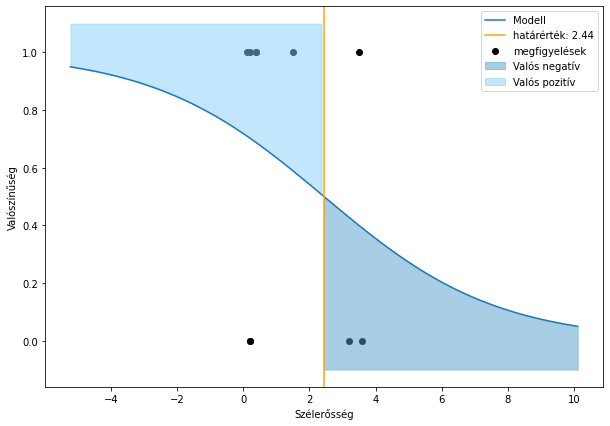

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)

def xcalc(p, alfa, beta):
    return (np.log((p/float(1-p)))-alfa)/beta

plt.clf()
# modell 0,05 és 0,95 valószínűség között
minimum = xcalc(0.05, log_reg.params[0], log_reg.params[1])
maximum = xcalc(0.95, log_reg.params[0], log_reg.params[1])
X_test = np.linspace(minimum, maximum, 100)
hatar = xcalc(0.5, log_reg.params[0], log_reg.params[1])
X_test = sorted(np.concatenate(([hatar], X_test)))
# add constant
X_test = sm.add_constant(X_test)
p_test = log_reg.predict(X_test)
plt.plot(X_test[:, 1], p_test, label="Modell")
# megfigyelések
plt.scatter(adatok[:, 0],adatok[:, 1], color="black", label="megfigyelések" )
# területek
szurt_x = [ x for x in X_test[:, 1] if x >= hatar ]
plt.fill_between(szurt_x, 
                 p_test[len(szurt_x)-1:], 
                 [ -0.1 for x in szurt_x], 
                 alpha=0.5, color='#539ecd', label="Valós negatív")
szurt_x = [ x for x in X_test[:, 1] if x < hatar ]
plt.fill_between(szurt_x, 
                 p_test[:len(szurt_x)], 
                 [ 1.1 for x in szurt_x], 
                 alpha=0.5, color='#87CEFA', label="Valós pozitív")
# határ
plt.axvline(hatar, label=f"határérték: {np.round(hatar, 2)}", color="orange")

plt.legend()
plt.xlabel("Szélerősség")
plt.ylabel("Valószínűség")
plt.show()

In [4]:
beta = 0.06
alfa = 0.2
esely = [ alfa + beta * x for x in adatok[:, 0] ]
print(esely)
p = [ np.e**o/(1+np.e**o) for o in esely ]
p = [ p[x] if adatok[x, 1] == 1 else 1-p[x] for x in range(len(p)) ]
print(np.round(p, 3))
logp = np.log(p)
print(np.round(logp, 3))
print(sum(logp))

[0.41000000000000003, 0.392, 0.29000000000000004, 0.41600000000000004, 0.21200000000000002, 0.20600000000000002, 0.21200000000000002, 0.224, 0.224, 0.21200000000000002]
[0.6010878788483698, 0.5967640657254464, 0.5719961329315186, 0.6025256899078176, 0.5528023854446936, 0.5513186483782152, 0.5528023854446936, 0.5557670142926275, 0.5557670142926275, 0.5528023854446936]
[0.601 0.403 0.572 0.397 0.553 0.551 0.447 0.556 0.556 0.447]
[-0.509 -0.908 -0.559 -0.923 -0.593 -0.595 -0.805 -0.587 -0.587 -0.805]
-6.871014226453228


# $R^2$

In [5]:
legrosszabb_f = np.log(len([ o for o in adatok[:, 1] if o == 1])/len([ o for o in adatok[:, 1] if o == 0]))
legrosszabb_p = [ np.e**legrosszabb_f/(1+np.e**legrosszabb_f) for _ in adatok[:,1]]
legrosszabb_p = [ legrosszabb_p[i] if adatok[i, 1] == 1 else 1-legrosszabb_p[i] for i in range(len(adatok[:, 1]))]
print(legrosszabb_p)
legrosszabb_logp = np.log(legrosszabb_p)
print(np.round(legrosszabb_logp, 3))
print(sum(legrosszabb_logp))

[0.6, 0.4, 0.6, 0.4, 0.6, 0.6, 0.4, 0.6, 0.6, 0.4]
[-0.511 -0.916 -0.511 -0.916 -0.511 -0.511 -0.916 -0.511 -0.511 -0.916]
-6.730116670092563


In [6]:
logistic_p = log_reg.predict(X)
logistic_p = [ logistic_p[i] if adatok[i, 1] == 1 else 1-logistic_p[i] for i in range(len(adatok[:, 1]))]
print(np.round(logistic_p, 3))
logistic_logp = np.log(logistic_p)
print(np.round(logistic_logp, 3))
print(sum(logistic_logp))

[0.4   0.572 0.589 0.609 0.703 0.711 0.297 0.687 0.687 0.297]
[-0.917 -0.558 -0.529 -0.495 -0.353 -0.341 -1.214 -0.376 -0.376 -1.214]
-6.3719338634507725


In [7]:
r2 =  (np.sum(legrosszabb_logp)-np.sum(logistic_logp))/np.sum(legrosszabb_logp)
r2

0.053220891137518045

In [8]:
log_reg.prsquared

0.05322089126618923

# p-értek

In [12]:
from scipy.stats import chi2

In [17]:
1-chi2.cdf(2*(np.sum(logistic_logp)-np.sum(legrosszabb_logp)), df=1)

0.39733864765269666